![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline


In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]


Distribución por intervalo de toxicidad:
target_bin
(-0.001, 0.1]    384368
(0.1, 0.2]        75905
(0.2, 0.3]        18882
(0.3, 0.4]        16802
(0.4, 0.5]        13766
(0.5, 0.6]        10168
(0.6, 0.7]         7986
(0.7, 0.8]         6522
(0.8, 0.9]         4823
(0.9, 1.0]         2240
Name: count, dtype: int64


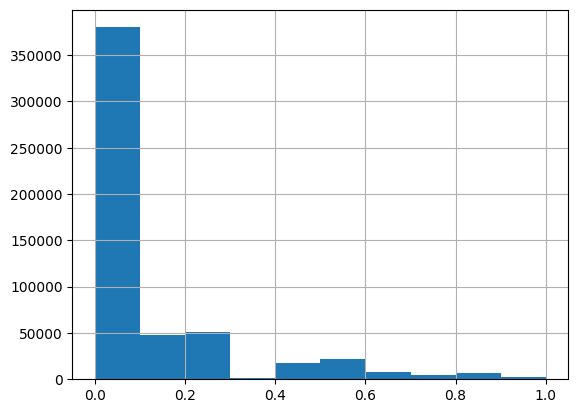

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()


df['target_bin'] = pd.cut(df['target'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], include_lowest=True)

bin_counts = df['target_bin'].value_counts(sort=False)

print("Distribución por intervalo de toxicidad:")
print(bin_counts)


## Distrubución en segmentos

En el conjunto de datos original, se observó una alta concentración de ejemplos dentro del rango 0.0 a 0.1 del target, lo que generaba un desbalance en la distribución. Para abordar este problema y facilitar el entrenamiento del módelo dadas las limitaciones computacionales, se optó por establecer un umbral máximo de 5000 muestras de segmento. Esta estrategia permitió reducir la cantidad total de datos manteniendo una distribución equilibrada entre los distintos rangos del target, lo cual contribuye a un aprendizaje más uniforme y evita que el modelo favorezca categorías con mayor frecuencia.

In [ ]:


sampled_dfs = []

max_records = 5000

# Iterar sobre los bins y aplicar muestreo (downsampling)
for bin_value in df['target_bin'].unique():
    bin_df = df[df['target_bin'] == bin_value]
    bin_size = len(bin_df)
    
    if bin_size > max_records:
        # Si el bin tiene más de 5000 registros, muestreamos hasta 8000
        sampled_bin = bin_df.sample(n=max_records, random_state=42)
    else:
        # Si el bin tiene menos de 5000, no lo cambiamos
        sampled_bin = bin_df
    
    sampled_dfs.append(sampled_bin)

# Concatenar los dataframes muestreados de cada bin
df_sampled = pd.concat(sampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación: Mostrar la distribución por bin después del muestreo
bin_counts = df_sampled['target_bin'].value_counts(sort=False)
print("Distribución por intervalo de toxicidad (después del muestreo):")
print(bin_counts)


y = df_sampled.target
y.describe()

Distribución por intervalo de toxicidad (después del muestreo):
target_bin
(-0.001, 0.1]    5000
(0.1, 0.2]       5000
(0.2, 0.3]       5000
(0.3, 0.4]       5000
(0.4, 0.5]       5000
(0.5, 0.6]       5000
(0.6, 0.7]       5000
(0.7, 0.8]       5000
(0.8, 0.9]       4823
(0.9, 1.0]       2240
Name: count, dtype: int64


count    47063.000000
mean         0.493753
std          0.279341
min          0.000000
25%          0.300000
50%          0.500000
75%          0.711864
max          1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df_sampled.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"Tamaño de la matriz de términos con min_df=5: {X_train.shape}")




Tamaño de la matriz de términos con min_df=5: (31532,)


## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Vectorización del texto
from sklearn.feature_extraction.text import CountVectorizer

vect_A = CountVectorizer(
    lowercase=True,
    stop_words='english',
    strip_accents='unicode',  
    ngram_range=(1, 2),
    max_df=0.8,
    min_df=5
)
X_train_dtm = vect_A.fit_transform(X_train)
X_test_dtm = vect_A.transform(X_test)

X_train_dtm.shape


(31532, 21681)

## Ajuste Paramatero n_estimators

n_estimators = 10 procesado (1/30)
n_estimators = 20 procesado (2/30)
n_estimators = 30 procesado (3/30)
n_estimators = 40 procesado (4/30)
n_estimators = 50 procesado (5/30)
n_estimators = 60 procesado (6/30)
n_estimators = 70 procesado (7/30)
n_estimators = 80 procesado (8/30)
n_estimators = 90 procesado (9/30)
n_estimators = 100 procesado (10/30)
n_estimators = 110 procesado (11/30)
n_estimators = 120 procesado (12/30)
n_estimators = 130 procesado (13/30)
n_estimators = 140 procesado (14/30)
n_estimators = 150 procesado (15/30)
n_estimators = 160 procesado (16/30)
n_estimators = 170 procesado (17/30)
n_estimators = 180 procesado (18/30)
n_estimators = 190 procesado (19/30)
n_estimators = 200 procesado (20/30)
n_estimators = 210 procesado (21/30)
n_estimators = 220 procesado (22/30)
n_estimators = 230 procesado (23/30)
n_estimators = 240 procesado (24/30)
n_estimators = 250 procesado (25/30)
n_estimators = 260 procesado (26/30)
n_estimators = 270 procesado (27/30)
n_estimators = 280 

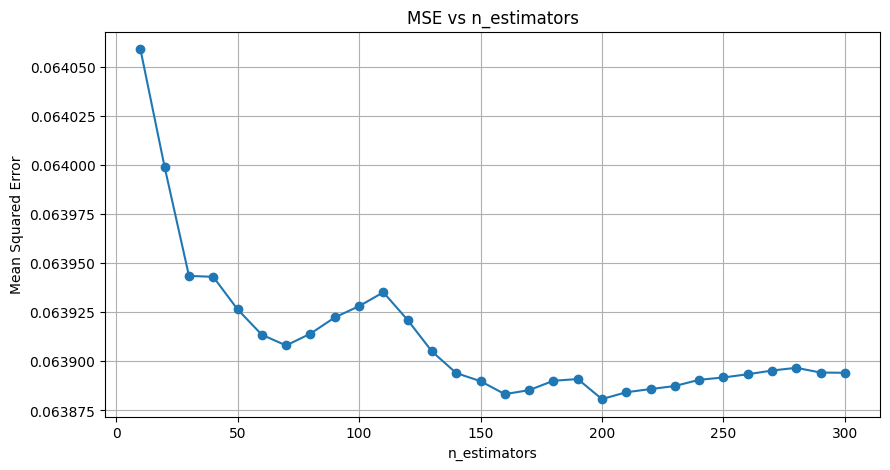

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Rango de valores para n_estimators
estimator_range = range(10, 310, 10)
mse_scores_estimators = []

# Procesar cada valor de n_estimators
for i, estimator in enumerate(estimator_range):
    reg = RandomForestRegressor(
        n_estimators=estimator,  # Usar el valor actual del bucle
        max_depth=10, 
        min_samples_leaf=2,    # Evita hojas con pocas muestras
        random_state=1,
        n_jobs=-1
    )
    
    # Validación cruzada (3-fold) con MSE negativo
    mse = cross_val_score(
        reg, X_train_dtm, y_train, cv=3, scoring='neg_mean_squared_error'
    ).mean()
    
    # Guardar MSE positivo
    mse_scores_estimators.append(-mse)
    
    # Mostrar progreso
    print(f"n_estimators = {estimator} procesado ({i+1}/{len(estimator_range)})")

# Gráfica del MSE
plt.figure(figsize=(10, 5))
plt.plot(estimator_range, mse_scores_estimators, marker='o')
plt.title('MSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

## Ajuste parametro depth_range

max_depth = 2 procesado (1/16)
max_depth = 4 procesado (2/16)
max_depth = 6 procesado (3/16)
max_depth = 8 procesado (4/16)
max_depth = 10 procesado (5/16)
max_depth = 12 procesado (6/16)
max_depth = 14 procesado (7/16)
max_depth = 16 procesado (8/16)
max_depth = 18 procesado (9/16)
max_depth = 20 procesado (10/16)
max_depth = 22 procesado (11/16)
max_depth = 24 procesado (12/16)
max_depth = 26 procesado (13/16)
max_depth = 28 procesado (14/16)
max_depth = 30 procesado (15/16)
max_depth = 32 procesado (16/16)


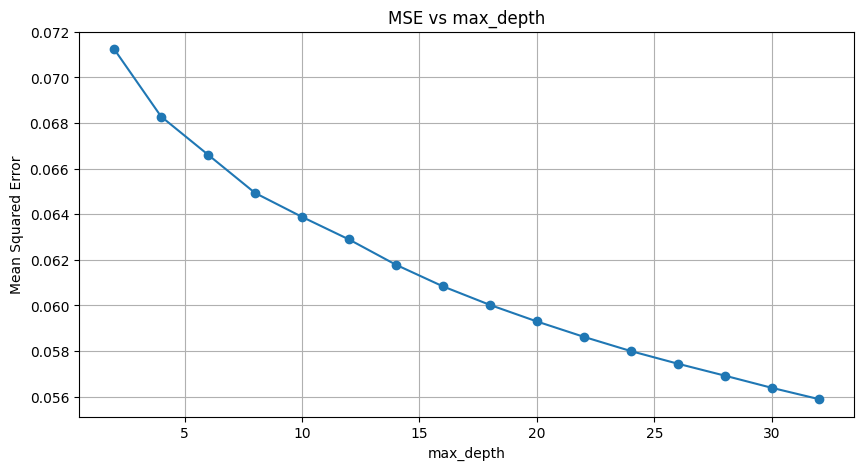

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Rango de valores para max_depth
depth_range = range(2, 33, 2)  # Desde profundidad 2 hasta 30
mse_scores_depth = []

# Probar distintos valores de profundidad
for i, depth in enumerate(depth_range):
    reg = RandomForestRegressor(
        n_estimators=200,       # Fijo en el valor óptimo encontrado
        max_depth=depth,        # Profundidad actual
        min_samples_leaf=2,     
        random_state=1,
        n_jobs=-1
    )
    
    # Validación cruzada con MSE
    mse = cross_val_score(
        reg, X_train_dtm, y_train, cv=3, scoring='neg_mean_squared_error'
    ).mean()
    
    mse_scores_depth.append(-mse)  # Convertir a positivo
    
    print(f"max_depth = {depth} procesado ({i+1}/{len(depth_range)})")

# Graficar resultados
plt.figure(figsize=(10, 5)) 
plt.plot(depth_range, mse_scores_depth, marker='o')
plt.title('MSE vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


## Ajuste Parametro max_features

max_features = 147 procesado (1/6)
max_features = 14 procesado (2/6)
max_features = 5420 procesado (3/6)
max_features = 10840 procesado (4/6)
max_features = 16260 procesado (5/6)
max_features = 21681 procesado (6/6)


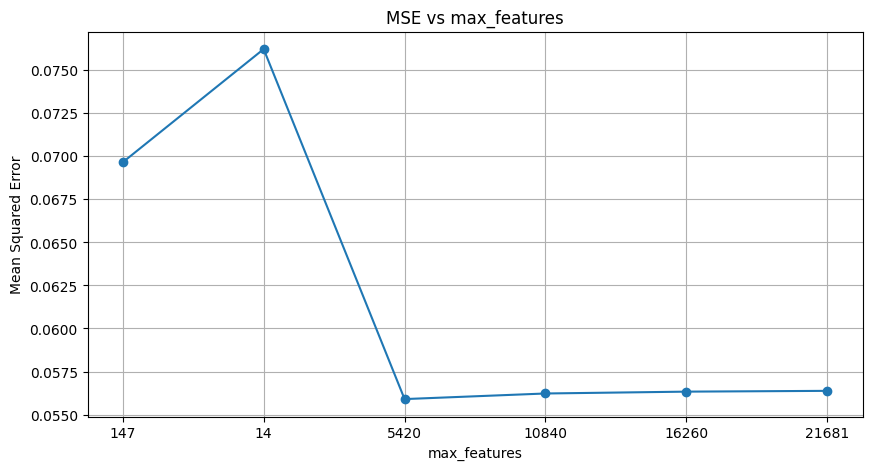

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Total de features
n_features = X_train_dtm.shape[1]

# Lista de valores para max_features
feature_options = [int(np.sqrt(n_features)), int(np.log2(n_features)),int(n_features * 0.25), int(n_features * 0.50),int(n_features * 0.75),n_features]

mse_scores_features = []

for i, max_feat in enumerate(feature_options):
    reg = RandomForestRegressor(
        n_estimators=200,
        max_depth=30,
        max_features=max_feat,
        min_samples_leaf=2,
        random_state=1,
        n_jobs=-1
    )
    
    mse = cross_val_score(reg, X_train_dtm, y_train, cv=3, scoring='neg_mean_squared_error').mean()
    mse_scores_features.append(-mse)
    
    print(f"max_features = {max_feat} procesado ({i+1}/{len(feature_options)})")

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot([str(f) for f in feature_options], mse_scores_features, marker='o')
plt.title('MSE vs max_features')
plt.xlabel('max_features')
plt.ylabel('Mean Squared Error')
plt.grid(True)   
plt.show()


## Desempeño del Modelo

In [12]:
from sklearn.metrics import mean_squared_error

n_features_final = int(X_train_dtm.shape[1]* 0.25)


reg = RandomForestRegressor(n_estimators=200,
        max_depth=30,
        max_features=n_features_final,
        min_samples_leaf=2,
        random_state=1,
        n_jobs=-1
    )
reg.fit(X_train_dtm, y_train)

y_pred = reg.predict(X_test_dtm)
mse = mean_squared_error(y_test, y_pred)
print(f" MSE en el set de test: {mse:.5f}")

 MSE en el set de test: 0.05518


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 2
vect_B = CountVectorizer(
    lowercase=True,
    stop_words='english',
    strip_accents='unicode',  
    ngram_range=(1, 3),
    max_df=0.8,
    min_df=5
)

X_train_dtm_b = vect_B.fit_transform(X_train)
X_test_dtm_b = vect_B.transform(X_test)

n_features_b = int(X_train_dtm_b.shape[1]* 0.25)


reg_b = RandomForestRegressor(n_estimators=200,
        max_depth=30,
        max_features=n_features_b,
        min_samples_leaf=2,
        random_state=1,
        n_jobs=-1
    )
reg_b.fit(X_train_dtm_b, y_train)

y_pred_b = reg_b.predict(X_test_dtm_b)
mse = mean_squared_error(y_test, y_pred_b)
print(f" MSE en el set de test: {mse:.5f}")


 MSE en el set de test: 0.05521


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

## Investigación y entendimiento

TfidfVectorizer es una Técnica de Tranformacion de Texto  que Basicamente permite que las palabras mas "Comunes" o que tienen una mayor frecuencia tengan menos peso y las que son mas "raras" o con poca Frecuencia tienen un mayor peso, esto se basa en el pricnipio de que estas palabras raras son las que nos dan mas informacion sobre el tipo de texto que estamos transformando, esta se expresa con la fórmula TF-IDF(t, d) = TF(t, d) * IDF(t), en donde TF es la frecuencia de una palabra normalizada por la longitud del documento y el IDF es la penalizacion de las palabras comunes o frecuentes ya que es la inversa de la frecuencia de la palabra en el documento. Por lo tanto, entre mas frecuente sea menor valor tendra y viceversa.

## Ventajas/Desventajas y comparación con CountVectorizer

Las ventajas principales son:

a. TfidfVectorizer tiene en cuenta la importancia relativa de la palabra en la oracion o texto que la compone por ello esta normaliza el peso de Frecuencia(TF) con la longitud de la oración o texto. Esto a diferencia de CountVectorizer que no normaliza las frecuencias de las palabras por la longitud de la oración o texto, solo cuenta la aparición de la misma.

b. TfidfVectorizer da un peso especifico a cada palabra en relación a la frecuencia invertida de la misma haciendo menos importante las palabras mas frecuentes, y dando relevancia a las palabras que realmente nos puedan dar indicativos para la clasificación de la misma, no obstante, hay que mencionar que CountVectorizer cuenta con parametros al igual que TfidfVectorizer aunque no tienen un comportamiento similar pretenden el mismo objetivo como max_df a la cual se le puede dar un porcentaje el cual penaliza las palabras que aparezcan en los textos por encima de este porcnetaje, en el anterior punto se le dio un porcentade 0.8 lo que eliminaría aquellas palabras que esten en el 80% de los textos.

c. Teoricamente, Ya que TfidfVectorizer nos permite encontrar relaciones mas complejas una de las ventajas claras es que sirve más para modelos de ML y clasificación en comparación con CountVectorizer que esta más relacionando con el conteo de Frecuencias.


Las principales Desventajas son:

a. Tiene una mayor complejidad computacional, lo cual limita su uso cuando no se cuenta con recursos computacionales amplios.

b. Puede ser menos interpretable en relación al CountVectorizer, que es mas intuitivo.

c. En uso de modelos ya complejos como Random Forest o XGboost puede que su impacto sea menor o igual al de CountVectorizer.



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Vectorización del texto usando TF-IDF
vect_C = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    strip_accents='unicode', 
    ngram_range=(1, 2),
    max_df=0.8,
    min_df=5
)

X_train_dtm_C = vect_C.fit_transform(X_train)
X_test_dtm_C = vect_C.transform(X_test)

# Definir cantidad de características a usar (25%)
n_features_C = int(X_train_dtm_C.shape[1] * 0.25)

# Modelo de regresión
reg_C = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    max_features=n_features_C,
    min_samples_leaf=2,
    random_state=1,
    n_jobs=-1
)

# Entrenamiento del modelo
reg_C.fit(X_train_dtm_C, y_train)

# Predicción sobre el set de test
y_pred_C = reg_C.predict(X_test_dtm_C)

# Evaluación con MSE
mse_C = mean_squared_error(y_test, y_pred_C)
print(f" MSE en el set de test: {mse_C:.5f}")


 MSE en el set de test: 0.05468


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

A pesar de que el uso de TfidfVectorizer con bigrams logró el mejor rendimiento con un MSE de 0.5468, la mejora fue muy poca  en comparación con los modelos que utilizan CountVectorizer. El modelo con CountVectorizer y bigrams obtuvo un MSE de 0.05518 y el modelo con trigramas alcanzó un MSE de 0.05521. Aunque los trigramas capturan más contexto de los textos, este modelo no mostró una mejora significativa y, se podría argumentar, agregó más ruido debido al aumento de características, lo que resultó en mayores costos computacionales y menor desempeño del modelo.

Este resultado sugiere que el preprocesamiento aplicado, como la eliminación de acentos (strip_accents='unicode'), remoción de stopwords y el uso de min_df y max_df— fue clave para homogeneizar la calidad de las representaciones de texto. Así, independientemente del vectorizador usado, este procesamiento ayudó a que los modelos matemáticos se vieran menos afectados por la elección entre CountVectorizer o TfidfVectorizer, manteniendo el desempeño en un rango muy cercano.